In [14]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob


In [15]:
!pip install textblob

In [17]:
df = pd.read_csv('Reviews.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299287 entries, 0 to 299286
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      299287 non-null  int64 
 1   ProductId               299287 non-null  object
 2   UserId                  299287 non-null  object
 3   ProfileName             299278 non-null  object
 4   HelpfulnessNumerator    299287 non-null  int64 
 5   HelpfulnessDenominator  299287 non-null  int64 
 6   Score                   299287 non-null  int64 
 7   Time                    299287 non-null  int64 
 8   Summary                 299276 non-null  object
 9   Text                    299287 non-null  object
dtypes: int64(5), object(5)
memory usage: 22.8+ MB


In [19]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName                9
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   11
Text                       0
dtype: int64

In [20]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
text_df['text'] = df['Text']
text_df.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [26]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity']=text_df['text'].apply(polarity)

In [27]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head(3)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
Name: Text, dtype: object

<Axes: xlabel='count', ylabel='Text'>

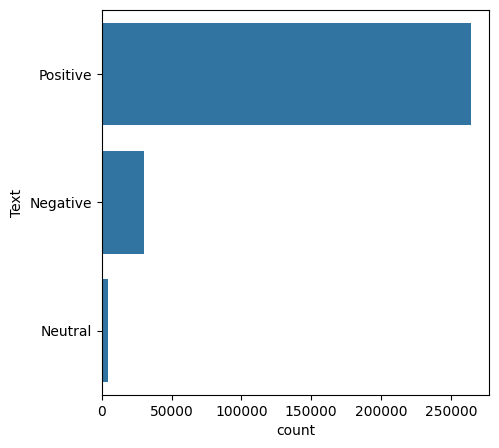

In [29]:
fig = plt.figure(figsize=(5,5))
sns.countplot(text_df['sentiment'])